## Global Forest Cover


## Part 1: Tree Loss per Year per country

In [1]:
#!pip install openpyxl

In [2]:
# import packages

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

import tensorflow as tf
from tensorflow import keras
from keras import metrics
tf.get_logger().setLevel('INFO')

import os


2024-07-15 00:10:29.985438: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Set seeds for reproducibility

In [3]:
import random as python_random

# Sets seeds for reproducibility 
def reset_seeds(seed_val = 0):
   np.random.seed(seed_val) 
   python_random.seed(seed_val)
   tf.random.set_seed(seed_val)

reset_seeds()

In [5]:
# LOAD Cleaned SHEET 2

gfc_tc_loss = pd.read_csv('../data/GlobalForestWatch/cleaned/gfc_tc_yearly.csv')

gfc_tc_loss


,Unnamed: 0,country,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,year,tc_loss_ha
0,0,Afghanistan,30,64385715,205791,71797,10741,2001,88
1,1,Akrotiri and Dhekelia,30,23448,456,383,42,2001,2
2,2,Albania,30,2873537,648680,589017,16472,2001,3729
3,3,Algeria,30,230804377,1223621,821606,89152,2001,3469
4,4,Andorra,30,45196,19004,18962,120,2001,2
...,...,...,...,...,...,...,...,...,...
5423,5423,Western Sahara,30,26732060,0,0,1,2023,0
5424,5424,Yemen,30,45220898,126,147,7047,2023,0
5425,5425,Zambia,30,75049202,24050819,22436285,768157,2023,190417
5426,5426,Zimbabwe,30,39068111,1414326,1061510,151989,2023,5690


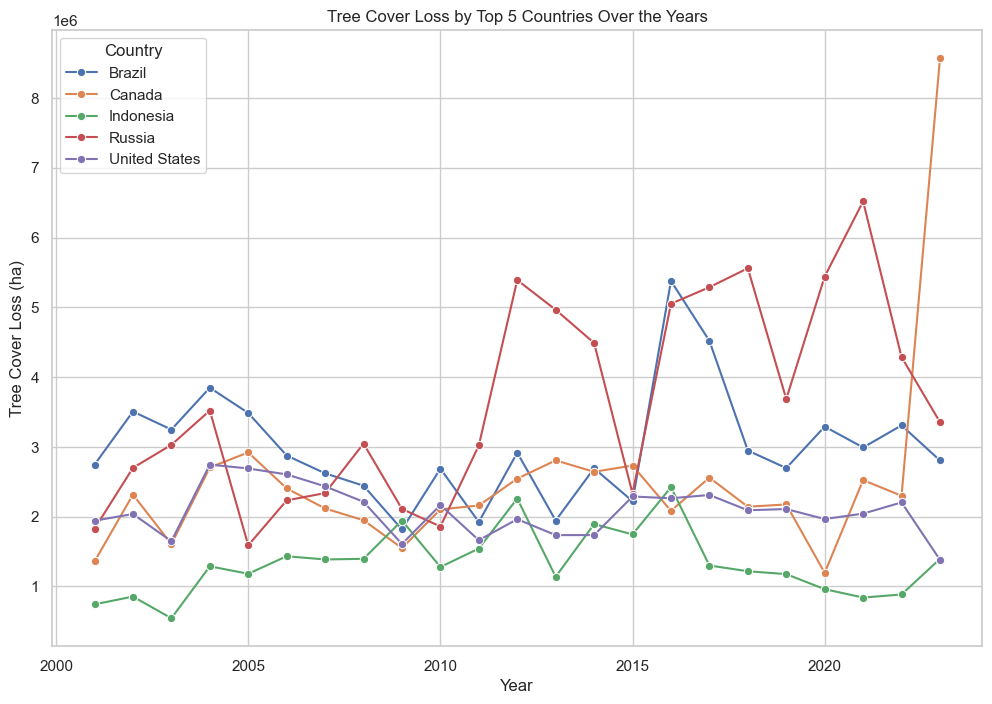

In [25]:
country_agg_df = gfc_tc_loss.groupby('country')['tc_loss_ha'].sum().reset_index()

# top 5 countries of tree cover loss
top_countries = country_agg_df.sort_values('tc_loss_ha', ascending=False).head(5)['country']

filtered_df = gfc_tc_loss[gfc_tc_loss['country'].isin(top_countries)]

aggregated_df = filtered_df.groupby(['year', 'country'])['tc_loss_ha'].sum().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.lineplot(data=aggregated_df, x='year', y='tc_loss_ha', hue='country', marker='o')

plt.title('Tree Cover Loss by Top 5 Countries Over the Years')
plt.xlabel('Year')
plt.ylabel('Tree Cover Loss (ha)')
plt.legend(title='Country')
plt.show()

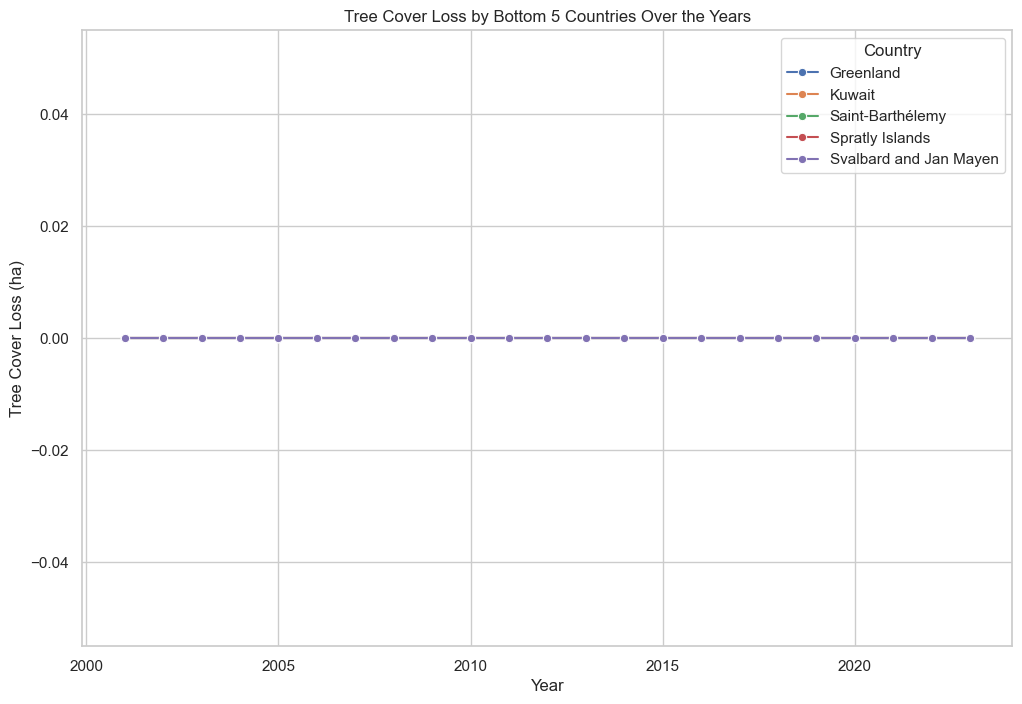

In [16]:

# bottom 5 countries of tree cover loss
bottom_countries = country_agg_df.sort_values('tc_loss_ha', ascending=True).head(5)['country']

filtered_df = gfc_tc_loss[gfc_tc_loss['country'].isin(bottom_countries)]

aggregated_df = filtered_df.groupby(['year', 'country'])['tc_loss_ha'].sum().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.lineplot(data=aggregated_df, x='year', y='tc_loss_ha', hue='country', marker='o')

plt.title('Tree Cover Loss by Bottom 5 Countries Over the Years')
plt.xlabel('Year')
plt.ylabel('Tree Cover Loss (ha)')
plt.legend(title='Country')
plt.show()

<Axes: xlabel='tc_loss_ha', ylabel='country'>

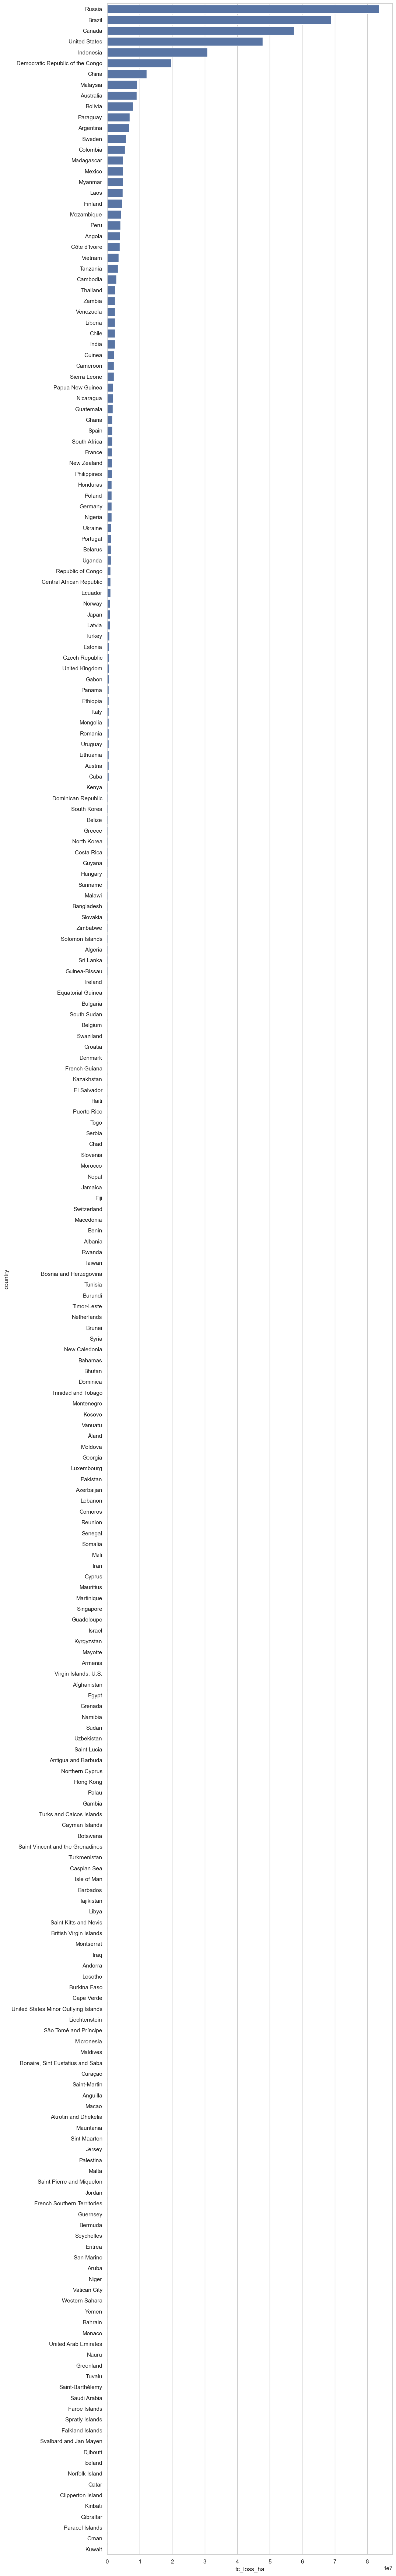

In [26]:
plt.figure(figsize=(10, 90))
descending_total_countries_df = country_agg_df.sort_values('tc_loss_ha', ascending=False)
sns.barplot(data=descending_total_countries_df, x='tc_loss_ha', y='country')


There are no negative values in the 'tc_loss_ha' column.
